# Solutions to Problem Set 4

## Shashank Sule

### Problem 1 

a) I use a two-step backward difference stencil as follows:

$$ f(x-h,y) \approx f(x,y) - hf_{x}(x,y) +\frac{h^2}{2}f_{xx}(x,y) + O(h^3) $$
$$ f(x-2h,y) \approx f(x,y) - 2hf_{x}(x,y) + 2h^2f_{xx}(x,y) + O(h^3) $$

Multiplying the first equation by 4 and subtracting from it the second we get that 

$$ 4f(x-h,y) - f(x-2h,y) \approx 3f(x,y) - 2hf_{x}(x,y) + O(h^3) $$

Rearranging this equation and dividing by 2h on both sides we have that

$$ \implies f_{x}(x,y) - \Big(\frac{3f(x,y) - 4f(x-h,y) + f(x-2h,y)}{2h}\Big) \approx O(h^2) $$

Thus the second order backward difference stencil for $f_x(x,y)$ is 

$$ f_{x}^{B}(x,y) = \frac{3f(x,y) - 4f(x-h,y) + f(x-2h,y)}{2h} $$

b) I use a centered difference approximation as follows: 

$$ f^{C}_{x}(x,y+h) = \frac{f(x+h,y+h) - f(x-h,y+h)}{2h}, \: f^{C}_{x}(x,y-h) = \frac{f(x+h,y-h) - f(x-h,y-h)}{2h} $$

Then 

$$ f_{xy}^{C}(x,y) = (f^{C}_{x})^{C}_{y} = \frac{f^{C}_{x}(x,y+h) - f^{C}_{x}(x,y-h)}{2h} = 
\frac{\frac{f(x+h,y+h) - f(x-h,y+h)}{2h} - \frac{f(x+h,y-h) - f(x-h,y-h)}{2h}}{2h} = \frac{f(x+h,y+h) - f(x-h,y+h) - f(x+h,y-h) + f(x-h,y-h)}{4h^2}$$

To find the error, consider the following taylor expansions: 

$$f(x+h,y+h) = f(x,y) + hf_x + hf_y + \frac{h^2}{2}f_xx + \frac{h^2}{2}f_yy + h^2f_{xy} + O(h^3) $$
   
$$ f(x+h,y-h) = f(x,y) + hf_x - hf_y + \frac{h^2}{2}f_xx + \frac{h^2}{2}f_yy - h^2f_{xy} + O(h^3)$$
   
  $$ f(x-h,y+h) = f(x,y) - hf_x + hf_y + \frac{h^2}{2}f_xx + \frac{h^2}{2}f_yy - h^2f_{xy} + O(h^3)$$
   
   $$f(x-h,y-h) = f(x,y) - hf_x - hf_y + \frac{h^2}{2}f_xx + \frac{h^2}{2}f_yy + h^2f_{xy} + O(h^3)$$

Adding the first and fourth equations and subtracting from them the sum of the second and third we get that 

$$ f(x+h,y+h) - f(x+h,y-h) - f(x-h,y+h) + f(x-h,y-h) = 4h^2f_{xy} + O(h^3)  $$ 

Dividing by $4h^2$ on both sides and subtracting $f_{xy}$ from both ends we have that 

$$ \Big| f_{xy} - \frac{f(x+h,y+h) - f(x-h,y+h) - f(x+h,y-h) + f(x-h,y-h)}{h^2}\Big| \approx O(h)$$

### Problem 2

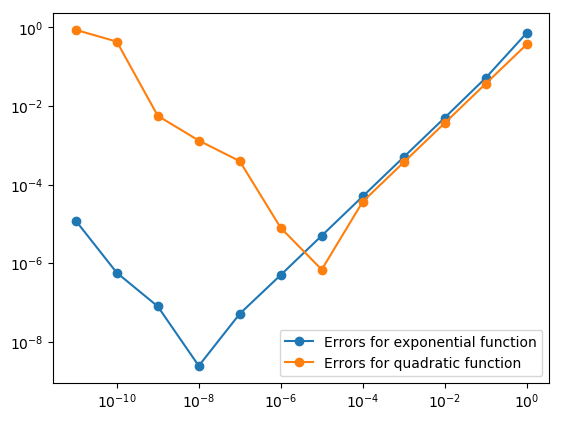

In [2]:
fprime_FD(f, x, h) = (f(x + h) - f(x))/h
g(x) = exp(x)
h(x) = x*x
trg = exp(1)
trh = 2000
valsg = [fprime_FD(g,1,10.0^(-i)) for i in 0:11]
valsh = [fprime_FD(h,1000,10.0^(-i)) for i in 0:11]
using PyPlot
loglog([10.0^(-i) for i in 0:11],abs.(valsg .- trg)./trg, label = "Errors for exponential function", "o-");

loglog([10.0^(-i) for i in 0:11],abs.(valsh .- trh)./trg, label = "Errors for quadratic function","o-");
legend();


The finite difference approximation for the derivative of the exponential function runs into a catastrophic loss of precision later than the quadratic function does. This is because we are computing the derivative for the quadratic function at a large function value of $10^6$. As a result, the approximation loses precision quite fast because differences between numbers of order $10^6$ waste more floating points than differences between numbers of order $10^0$. 

### Problem 3

a) I would define the following system of differential equations: 

$$ \begin{bmatrix}\dot{x_1} \\ \dot{x_2} \end{bmatrix} = \begin{bmatrix}x_2 \\ \cos(t^2) - \omega_{0}x_1 \end{bmatrix} $$

Now put this into RK4 and solve! 

In [ ]:
using LinearAlgebra
function second_derivative(N)
    # construct the matrix A implementing the fourth derivative
    A = diagm( 0 => -2*ones(N),
               1 => 1*ones(N-1),
              -1 => 1*ones(N-1), 
                )
    return A
end

function first_derivative(N)
    A = diagm( 0 => zeros(N),
               1 => 1*ones(N-1),
              -1 => -1*ones(N-1), 
                )
    return A
end

ω = 4.3
f(x,t) =  cos(t^2) - (ω^2)*x
N = 10000;
a = 0.0
b = 10.0
d = (b-a)/(N+1) #Set N = 100
times = collect(0.0 .+ d.*(1:N));
C = cos.(times.^2);
A = second_derivative(N);
I = diagm(0 => ones(N));
x0 = zeros(N);
x0[1] = 0.3;
x0[N] = -2.9;
x = inv(((ω^2)*(d^2)*inv(A) + I))*((d^2)*inv(A)*C - inv(A)*x0)

plot(times, x, "r-", label="Trajectory");
plot(times, C, label="Forcing function");
legend();

In [ ]:
ω = 4.3
f(x,t) =  cos(t^2) - (ω^2)*x
N = 10000;
a = 0.0
b = 10.0
d = (b-a)/(N+1) #Set N = 100
times = collect(0.0 .+ d.*(1:N));
C = cos.(ω .*times);
A = second_derivative(N);
I = diagm(0 => ones(N));
x0 = zeros(N);
x0[1] = 0.3;
x0[N] = -2.9;
x = inv((ω*(d^2)*inv(A) + I))*((d^2)*inv(A)*C - inv(A)*x0);

plot(times, x, "r-", label="Trajectory");
plot(times, C, label="Forcing function");
legend();

This phenomenon is resonance as the frequency of the forcing function matches the frequency of the oscillating body set at $\omega_0 = 4.3$

### Problem 4 

In [22]:
using LinearAlgebra

function Discrete_Laplacian(N,h)

X1 = first_derivative(N)
X2 = second_derivative(N)
XX1 = zeros(N^2, N^2)
XX2 = zeros(N^2, N^2)
for i in 1:N
    XX1[i*N - (N-1): i*N, i*N - (N-1): i*N] = X1
    XX2[i*N - (N-1): i*N, i*N - (N-1): i*N] = X2
end
    
I1 = diagm(0=> ones(N))
K1 = diagm(0 => -1*ones(N))
YY1 = zeros(N^2, N^2);

for i in 1:N-1 #i records the block #The dy matrix
    j = i+1
    YY1[i*N - (N-1): i*N, j*N - (N-1): j*N] = I1
end
        
for i in 2:N
    j = i-1
    YY1[i*N - (N-1): i*N, j*N - (N-1): j*N] = -I1
end

I2 = diagm(0=> -2*ones(N))
YY2 = zeros(N^2, N^2)

for i in 1:N-1 #i records the block #The dy matrix
    j = i+1
    YY2[i*N - (N-1): i*N, j*N - (N-1): j*N] = I1
end
        
for i in 2:N
    j = i-1
    YY2[i*N - (N-1): i*N, j*N - (N-1): j*N] = I1
end

for i in 1:N
    
    YY2[i*N - (N-1): i*N, i*N - (N-1): i*N] = I2
end
    
    return (1/h^2)*(XX2 + YY2)
end

Discrete_Laplacian (generic function with 2 methods)

a) The $D_x, $D_y$, $L_x$, $L_y$ matrices (N=3 case) are as follows: 

In [10]:
N=3
X1 = first_derivative(N)
X2 = second_derivative(N)
XX1 = zeros(N^2, N^2)
XX2 = zeros(N^2, N^2)
for i in 1:N
    XX1[i*N - (N-1): i*N, i*N - (N-1): i*N] = X1
    XX2[i*N - (N-1): i*N, i*N - (N-1): i*N] = X2
end

I1 = diagm(0=> ones(N))
K1 = diagm(0 => -1*ones(N))
YY1 = zeros(N^2, N^2);

for i in 1:N-1 #i records the block #The dy matrix
    j = i+1
    YY1[i*N - (N-1): i*N, j*N - (N-1): j*N] = I1
end
        
for i in 2:N
    j = i-1
    YY1[i*N - (N-1): i*N, j*N - (N-1): j*N] = -I1
end

I2 = diagm(0=> -2*ones(N))
YY2 = zeros(N^2, N^2)

for i in 1:N-1 #i records the block #The dy matrix
    j = i+1
    YY2[i*N - (N-1): i*N, j*N - (N-1): j*N] = I1
end
        
for i in 2:N
    j = i-1
    YY2[i*N - (N-1): i*N, j*N - (N-1): j*N] = I1
end

for i in 1:N
    
    YY2[i*N - (N-1): i*N, i*N - (N-1): i*N] = I2
end

XX1

9×9 Array{Float64,2}:
  0.0   1.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0
 -1.0   0.0  1.0   0.0   0.0  0.0   0.0   0.0  0.0
  0.0  -1.0  0.0   0.0   0.0  0.0   0.0   0.0  0.0
  0.0   0.0  0.0   0.0   1.0  0.0   0.0   0.0  0.0
  0.0   0.0  0.0  -1.0   0.0  1.0   0.0   0.0  0.0
  0.0   0.0  0.0   0.0  -1.0  0.0   0.0   0.0  0.0
  0.0   0.0  0.0   0.0   0.0  0.0   0.0   1.0  0.0
  0.0   0.0  0.0   0.0   0.0  0.0  -1.0   0.0  1.0
  0.0   0.0  0.0   0.0   0.0  0.0   0.0  -1.0  0.0

In [12]:
XX2 

9×9 Array{Float64,2}:
 -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -2.0   1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  -2.0   1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0

In [13]:
YY1 

9×9 Array{Float64,2}:
  0.0   0.0   0.0   1.0   0.0   0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   1.0   0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   1.0  0.0  0.0  0.0
 -1.0  -0.0  -0.0   0.0   0.0   0.0  1.0  0.0  0.0
 -0.0  -1.0  -0.0   0.0   0.0   0.0  0.0  1.0  0.0
 -0.0  -0.0  -1.0   0.0   0.0   0.0  0.0  0.0  1.0
  0.0   0.0   0.0  -1.0  -0.0  -0.0  0.0  0.0  0.0
  0.0   0.0   0.0  -0.0  -1.0  -0.0  0.0  0.0  0.0
  0.0   0.0   0.0  -0.0  -0.0  -1.0  0.0  0.0  0.0

In [14]:
YY2

9×9 Array{Float64,2}:
 -2.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0
  0.0  -2.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0
  0.0   0.0  -2.0   0.0   0.0   1.0   0.0   0.0   0.0
  1.0   0.0   0.0  -2.0   0.0   0.0   1.0   0.0   0.0
  0.0   1.0   0.0   0.0  -2.0   0.0   0.0   1.0   0.0
  0.0   0.0   1.0   0.0   0.0  -2.0   0.0   0.0   1.0
  0.0   0.0   0.0   1.0   0.0   0.0  -2.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0   0.0   0.0  -2.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  -2.0

In [23]:
ρ(x,y) = exp(-50*(x-0.5)^2 - 50*(y-0.5)^2 )
N = 20
n = 1/21 

Gridvals = zeros(N+2, N+2);
for i in 2:N+1
    for j in 2:N+1
        Gridvals[i,j] = ρ((i-1)*n, (j-1)*n)
    end
end

Gridvals = Gridvals[2:N+1, 2:N+1]

20×20 Array{Float64,2}:
 1.29487e-9  9.9665e-9    6.11475e-8   …  9.9665e-9    1.29487e-9
 9.9665e-9   7.67111e-8   4.70645e-7      7.67111e-8   9.9665e-9 
 6.11475e-8  4.70645e-7   2.88755e-6      4.70645e-7   6.11475e-8
 2.99044e-7  2.30171e-6   1.41217e-5      2.30171e-6   2.99044e-7
 1.16577e-6  8.97278e-6   5.50507e-5      8.97278e-6   1.16577e-6
 3.62251e-6  2.7882e-5    0.000171065  …  2.7882e-5    3.62251e-6
 8.97278e-6  6.90625e-5   0.000423719     6.90625e-5   8.97278e-6
 1.7716e-5   0.000136358  0.000836597     0.000136358  1.7716e-5 
 2.7882e-5   0.000214605  0.00131667      0.000214605  2.7882e-5 
 3.49787e-5  0.000269227  0.00165179      0.000269227  3.49787e-5
 3.49787e-5  0.000269227  0.00165179   …  0.000269227  3.49787e-5
 2.7882e-5   0.000214605  0.00131667      0.000214605  2.7882e-5 
 1.7716e-5   0.000136358  0.000836597     0.000136358  1.7716e-5 
 8.97278e-6  6.90625e-5   0.000423719     6.90625e-5   8.97278e-6
 3.62251e-6  2.7882e-5    0.000171065     2.7882e-5 

In [24]:
Vectorvals = Gridvals[1,:]
for i in 2:20 
    Vectorvals = vcat(Vectorvals, Gridvals[i,:])
end
L = Discrete_Laplacian(20,n);
Potentials = inv(L)*Vectorvals;
Pots = transpose(reshape(Potentials,(N,N)))

20×20 Transpose{Float64,Array{Float64,2}}:
 -0.000155201  -0.000310401  -0.000465163  …  -0.000310401  -0.000155201
 -0.000310401  -0.000621241  -0.00093208      -0.000621241  -0.000310401
 -0.000465163  -0.00093208   -0.00140121      -0.00093208   -0.000465163
 -0.000618172  -0.0012407    -0.00187034      -0.0012407    -0.000618172
 -0.000766821  -0.00154221   -0.00233304      -0.00154221   -0.000766821
 -0.000906905  -0.00182824   -0.00277711   …  -0.00182824   -0.000906905
 -0.00103255   -0.00208669   -0.00318358      -0.00208669   -0.00103255 
 -0.00113657   -0.00230225   -0.00352704      -0.00230225   -0.00113657 
 -0.00121144   -0.00245838   -0.00377867      -0.00245838   -0.00121144 
 -0.00125074   -0.0025407    -0.00391236      -0.0025407    -0.00125074 
 -0.00125074   -0.0025407    -0.00391236   …  -0.0025407    -0.00125074 
 -0.00121144   -0.00245838   -0.00377867      -0.00245838   -0.00121144 
 -0.00113657   -0.00230225   -0.00352704      -0.00230225   -0.00113657 
 -0.0010

In [25]:
using Pkg
Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %12.5 %>                              ]  25.0 %Fetching: [=============>                           ]  30.4 %>                      ]  42.8 %=======================>                 ]  55.3 %]  67.6 %>       ]  80.6 %======================================>  ]  93.1 %94.2 % Resolving package versions...
 Installed Compat ──── v2.0.0
 Installed MbedTLS ─── v0.6.8
 Installed StatsBase ─ v0.29.0
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [34da2185] ↑ Compat v1.5.1 ⇒ v2.0.0
  [739be429] ↑ MbedTLS v0.6.7 ⇒ v0.6.8
  [2913bbd2] ↑ StatsBase v0.28.1 ⇒ v0.29.0
  Building MbedTLS → `~/.julia/packages/MbedTLS/X4xar/deps/build.log`


┌ Info: Recompiling stale cache file /Users/shashanksule/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


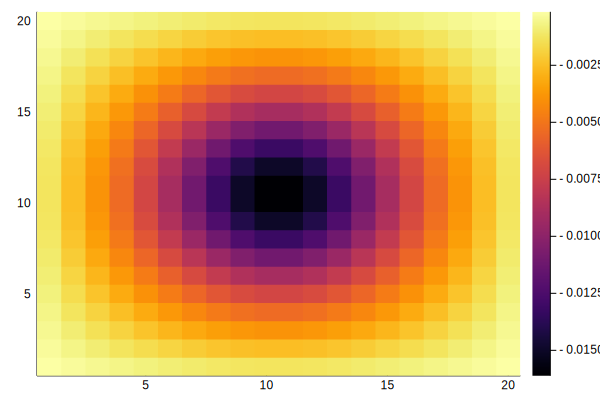

In [26]:
using Plots
heatmap(Pots)

This is the electric potential for the first function

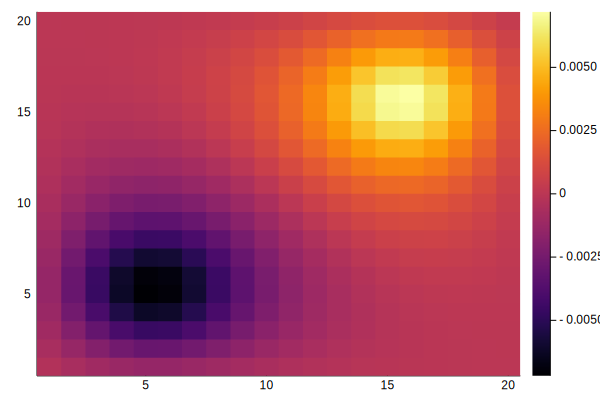

In [27]:
ρ(x,y) = exp(-100*(x-0.25)^2 - 100*(y-0.25)^2 ) - exp(-100*(x-0.75)^2 - 100*(y-0.75)^2 )
N = 20
n = 1/21 

Gridvals = zeros(N+2, N+2);
for i in 2:N+1
    for j in 2:N+1
        Gridvals[i,j] = ρ((i-1)*n, (j-1)*n)
    end
end

Gridvals = Gridvals[2:N+1, 2:N+1]

Vectorvals = Gridvals[1,:]
for i in 2:20 
    Vectorvals = vcat(Vectorvals, Gridvals[i,:])
end
L = Discrete_Laplacian(20,n);
Potentials = inv(L)*Vectorvals;
Pots = transpose(reshape(Potentials,(N,N)))

using Plots
heatmap(Pots)

This is the potential for the second one 